# numpy - 3

## Vectorizing function / iterating over ndarrays
numpy tries its best to understand how to apply functions to arrays, but needs help sometimes

In [3]:
import numpy as np

x = np.linspace(-1,1,11)
print(x)
print(abs(x))

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[1.  0.8 0.6 0.4 0.2 0.  0.2 0.4 0.6 0.8 1. ]


Let's try to reimplement absolute value and apply this function to the `ndarray` `x`:

In [4]:
def myabs(x):
    if x < 0:
        return -x
    else:
        return x
print(myabs(1), myabs(-1))

1 1


In [5]:
print(myabs(x))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This fails because of the test `if x < 0`, which is ambiguous when `x` is an array. Technically, we don't want to apply this test to `x` but to each element of `x`.

We could rewrite this function to go through all items in `x`. 

In [17]:
def myabs2(x):
    absx = np.empty(x.shape)
    for i,xx in enumerate(x):
        if xx < 0:
            absx[i] = -xx
        else:
            absx[i] = xx
    return absx
print (myabs2(x))

[1.  0.8 0.6 0.4 0.2 0.  0.2 0.4 0.6 0.8 1. ]


In [18]:
y = np.array([[1,-1,1,1],
              [2,3,-4,5]])
myabs2(y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This fails again. why?

In [23]:
def myabs3(x):
    absx = np.empty(x.shape)
    for i,xx in np.ndenumerate(x):
        if xx < 0:
            absx[i] = -xx
        else:
            absx[i] = xx
    return absx

In [21]:
print (myabs3(x))

[1.  0.8 0.6 0.4 0.2 0.  0.2 0.4 0.6 0.8 1. ]


In [26]:
print (myabs3(y))

[[1. 1. 1. 1.]
 [2. 3. 4. 5.]]
1


`np.ndenumerate` generalized enumerate where the indices become 'multi-indices'

Python is able to convert a regular function into a vectorized one (i.e. make sure the function is applied to all entries in a ndarray.
It is the `np.vectorize` method:

In [28]:
myabsVect = np.vectorize(myabs)
print(y)
print(myabsVect(y))

[[ 1 -1  1  1]
 [ 2  3 -4  5]]
[[1 1 1 1]
 [2 3 4 5]]


## Random numbers

In [29]:
# Create a random number generator
rng = np.random.default_rng()

# generate random numbers using a uniform distribution
for i in range(10):
    print(rng.uniform(low = -1, high = 1, size=2))

[ 0.87531294 -0.58338056]
[ 0.32096193 -0.56597511]
[-0.09191292  0.10949632]
[0.74650647 0.38047035]
[ 0.554906   -0.00561924]
[ 0.98092603 -0.09397919]
[0.29109648 0.87264771]
[0.03720601 0.02445723]
[ 0.55704459 -0.86777258]
[-0.84048553 -0.93980906]


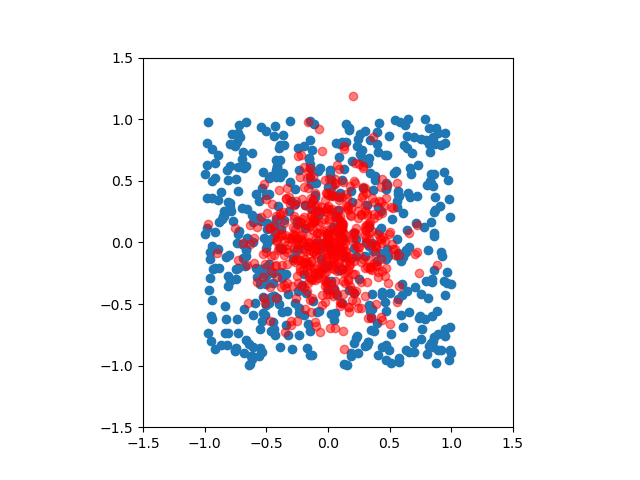

In [53]:
%matplotlib widget
import matplotlib.pyplot as plt
n = 501
fig, ax = plt.subplots(1,1)
Xu = rng.uniform(low=-1, high=1, size=n)
Yu = rng.uniform(low=-1, high=1, size=n)
ax.scatter(Xu, Yu, marker = 'o')
Xn = rng.normal(loc=0, scale = 0.3, size=n)
Yn = rng.normal(loc=0, scale = 0.3, size=n)
ax.scatter(Xn, Yn, marker = 'o', color = 'red', alpha = 0.5)
ax.axis([-1.5,1.5,-1.5,1.5])
ax.set_aspect('equal', 'box')

## Application: computing $\pi$ using the Monte Carlo method

number of points inside the circle: 7868
probability that a point is inside the circle (estimated): 3.147200


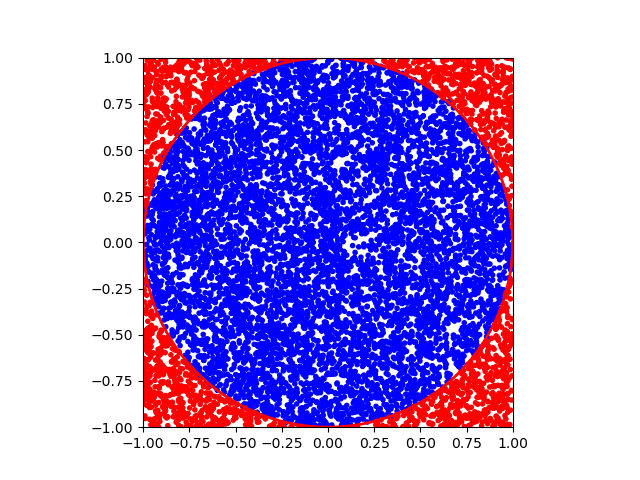

In [69]:
n = 10000
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, ax = plt.subplots()
plt.plot([np.cos(theta) for theta in np.linspace(0,2*np.pi,101)],[np.sin(theta) for theta in np.linspace(0,2*np.pi,101)], linewidth=2, color='red')

X = rng.uniform(low=-1, high=1, size = n)
Y = rng.uniform(low=-1, high=1, size = n)
C = np.empty(n)
nin = 0
for i in range(n):
    if X[i]**2 + Y[i]**2 <= 1:
        C[i] = 0
        nin += 1
    else:
        C[i] = 1
ax.scatter(X, Y, c=C, cmap = 'bwr', marker = '.')
ax.axis([-1,1,-1,1])
ax.set_aspect('equal', 'box')

print(f"number of points inside the circle: {nin}")
print(f"probability that a point is inside the circle (estimated): {nin/n*4:f}")